# 確率過程

各$t \in [0, \infty)$に対して、確率変数$X_t$が与えられた時に、$X=(X_t)_{t \geq 0}$を**確率過程**という。  
添え字$t$は時間を表すことが多く、$t$が$t \in [0,\infty)$のように連続値をとりうる場合には、$X$を特に連続確率過程とよぶ。  
要するに時間などの条件によって変化する確率変数の数理モデルのことをいう。  
確率過程$X=(X_t)_{t \geq 0}$が与えられたとき、その実現値の集合を$(x_t)_{t \geq 0}$とかくと、$t \rightarrow x_t$なるtの関数が描かれる。  
これを$X$の**パス**という。連続的なもの不連続なもの様々ある。

# 独立定常増分

確率過程$X=(X_t)_{t \geq 0}$が以下の(1)(2)を満たすとする。  
(1)任意の$0 = t_0<t_1<t_2<..<t_{n-1}<t_n$に対して、$X_{t0}, X_{t1}-X_{t0}, X_{tn}-X_{tn-1}$が互いに独立である(独立増分性)  
(2)任意の$0 \leq t \leq t+h$に対して、$X_{t+h}-X_t$の分布は、$X_h-X_0$の分布と同一である(定常増分性)  
このような確率過程$X$を**独立定常増分過程**という。  
以降で上記の性質を持つ代表例として、ブラウン運動、ポアソン過程について記載する。

# ブラウン運動

$B_0=0$なる確率過程$B=(B_t)_{t \geq 0}$が以下の(1)~(3)の性質を満たすとき、$B$を**ブラウン運動**という  
(1)$B$は独立定常増である  
(2)各$t \geq 0$に対して、$B_t \sim N(\mu t, \sigma^2t)$  
(3)$B$のパスが連続である  
特に$\mu=0, \sigma^2=1$となるものを**標準ブラウン運動**または**ウィナー過程**という。  
ブラウン運動に対して、$0 = t_0<t_1<t_2<..<t_n = t = 1$なる$[0,1]$の分割をとる。ただし、$t_k = \frac{k}{n}(k=0,1,..,n)$とする。  
このとき各$k$に対して、
$$
B_{tk} = \sum_{i=1}^{k} \varepsilon i, \quad \varepsilon i=B_{ti}-B_{ti-1}
$$
のように表すことができて、ブラウン運動の定義により$\varepsilon i$は独立に$N(\mu/n, \sigma^2/n)$に従う。  
点列$B_{t0}(=0), B_{t1},B_{t2},..,B_{tn}$らはブラウン運動のパスの一部であり、確率変数列($\varepsilon i$)の和(**ランダムウォーク**)になっている。

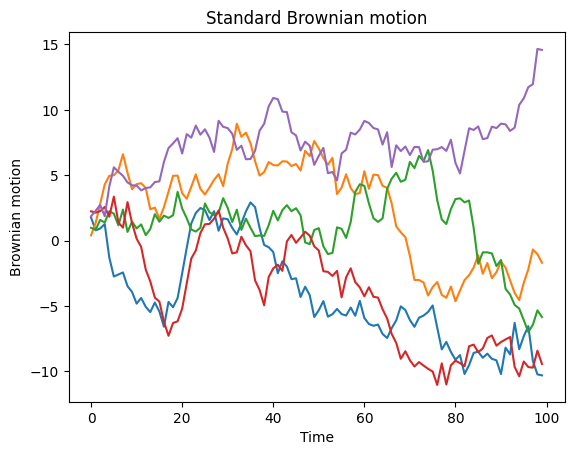

In [1]:
# 標準ブラウン運動のランダムウォークを描画
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

myu, sigma = 0, 1.0
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(myu, sigma, size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu, sigma, size=5)

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.title("Standard Brownian motion")
plt.xlabel("Time")
plt.ylabel("Brownian motion")
plt.show()

# ブラウン運動のパラメータ推定

ブラウン運動は時間に関して連続的なパスを持つが、応用上このようなモデルを用いるとき、その観測データは時間に関して離散的に観測されることが通常である。  
そこで$B_t \sim N(\mu t, \sigma^2t)$なるブラウン運動$B=(B_t)_{t \geq 0}$のパスを時間間隔$\Delta > 0$で観測し、データの観測データから$\mu$と$\sigma^2$を推定する$B_0,B_{\Delta},B_{2 \Delta},..,B_{n \Delta}$を得たと仮定して、パラメータ$\mu, \sigma^2$を推定することを考える。  
ブラウン運動の定常増分性により$Z_k := B_{k \Delta}-B_{(k-1) \Delta} \sim N(\mu \Delta, \sigma^2 \Delta)(k=1,...,n)$らは独立であるから、$(Z_k)_{k=1,...,n}$をデータとする最尤法を考える。  
この対数尤度関数$ℓ_{n}(\mu, \sigma)$は
$$
ℓ_{n}(\mu, \sigma) = - \frac{1}{2} \sum_{k=1}^{n} \frac{(Z_k - \mu \Delta)^2}{\sigma^2 \Delta} - \frac{n}{2} \log (\sigma^2 \Delta) + 定数
$$
であるから、これを$(\mu, \sigma^2)$に関して最大化すればよいが、$(\mu \Delta, \sigma^2 \Delta)$をパラメータとする正規分布の最尤推定量より、以下の式が直ちに得られる。
$$
\hat{\mu} \Delta = \frac{1}{n} \sum_{k=1}^{n} Z_k, \quad \hat{\sigma}^2 \Delta = \frac{1}{n} \sum_{k=1}^{n} Z_k^2 - (\frac{1}{n} \sum_{k=1}^{n} Z_k)^2
$$
*平均と二乗の平均-平均の二乗を意味する。  
この両辺を$\Delta > 0$で割ることによって、最尤推定量$(\hat{\mu}, \hat{\sigma}^2)$が得られる。

In [3]:
# パラメータの推定を実行
myu, sigma = 1.0, 1.0
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 上記のパラメータで観測データを生成
y[0,:] = stats.norm.rvs(myu, sigma, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu,sigma,size=1)

# パラメータを推定(ブラウン運動が正規分布に従うことを利用)
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

# BkΔ-BkΔ-1の平均
mu_estimate = np.mean(diff, axis=0) 
# 分散の公式を利用(E[X**2]-(E[X])**2)
sigma2_estimate = np.mean(diff**2, axis=0) - mu_estimate**2 

# 最尤推定量
print(f"μ hat:{mu_estimate}")
print(f"σ hat:{sigma2_estimate}")

μ hat:[0.9843216]
σ hat:[0.93982811]


# ポアソン過程

各$t$で自然数値をとるような確率過程$N=(N_t)_{t> \geq 0}$を考え、$N_0 = 0$とする。  
この$N$が以下の(1)(2)の性質を満たすとき、強度$\lambda$の**ポアソン過程**という。  
(1)$N$は独立定常増である  
(2)各$t \geq 0$に対して$N_t$は強度$\lambda t$のポアソン分布に従う  
ポアソン過程は連続時間確率過程であるが、自然数にしか値をとらない階差型のパスを持ち、応用上は何らかのイベントの回数を表すモデルとして用いられることが多い。  
特に、稀なイベントで、その発生回数が、それ以前のイベントの発生回数とは独立であるような現象のモデルとして用いられる。Ex, 地震や自動車事故

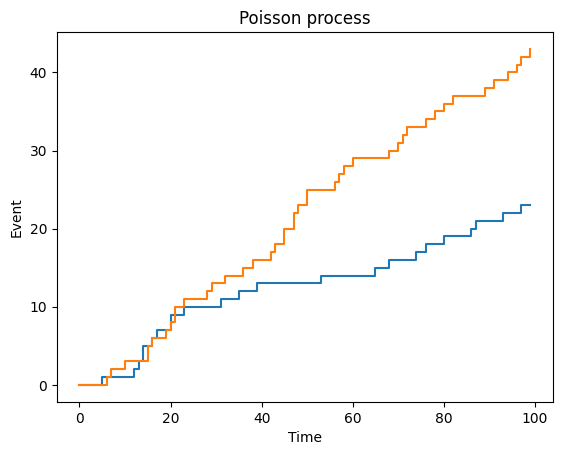

In [4]:
# ポアソン過程を描画
lamb = 0.3
path_num = 2
x = np.arange(0,100,1) # 経過時間
y = np.zeros([x.shape[0], path_num]) # イベント発生回数

y[0,:] = stats.poisson.rvs(lamb, size=path_num)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb, size=path_num)

x_ = np.repeat(x,2)
y_ = np.zeros([200,path_num])
for i in range(1,200):
    y_[i,:] = y[(i-1)//2,:]

for i in range(y.shape[1]):
    plt.plot(x_,y_[:,i])

plt.title("Poisson process")
plt.xlabel("Time")
plt.ylabel("Event")
plt.show() # 階段型のパスになる

# 計数過程としての表現

正値確率数列$T = (T_k)_{k=1,2,..}$が、自然数$k$に対して$T_k<T_{k+1}$を満たすとし$T_0=0$とする。  
これを用いて確率過程$N = (N_t)_{t \geq 0}$を
$$
N_t = \sum_{k=1}^{\infty} I(T_k \leq t)
$$
と定める。ただし、$I(A)$はイベント$A$が起こったとき1、起こらなければ0をとる定義関数である。  
このような$N$を$T$から定める$N$の**計数過程**または**点過程**という。

# ポアソン過程のパラメータ推定

強度$\lambda$を持つポアソン過程のパラメータを推定するにあたり、以下の2種類のデータ形式を考える。  
(1)イベントの起こった時刻T1,T2,..,Tnを観測する  
(2)時間間隔Δ>0によってデータN0,NΔ,N1Δ,..,NnΔを観測する  
(1)の形式では各イベント発生の正確な時刻が観測されるのに対し、(2)の形式ではイベントの正確な時刻は観測されず、その回数しかわからない。
それぞれの場合に応じて推定方法は異なる。

**(1)の場合の推定**:$W_k = T_k-T_{k-1}$として、データ$W_1,W_2,..,W_n$に変換すれば、これらは平均$1/\lambda$の指数分布に従うことを利用して最尤推定量を求める。

In [5]:
lamb = 0.4 # 推測したいパラメータ
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 観測データを生成
y[0,:] = stats.expon.rvs(1/lamb, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.expon.rvs(1/lamb, size=1)

# Wk
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

# ΣWk
lambda_estimate = 1/np.mean(diff, axis=0)

# 最尤推定量
print(f"推定量λ:{lambda_estimate}")

推定量λ:[0.29329059]


**(2)の場合の推定**：$M_k = N_{k \Delta}-N_{(k-1) \Delta}$として、データを$M_1,..,M_n$に変換すると、ポアソン過程の独立定常増分性により、これらは独立に$M_k \sim Po(\lambda \Delta)$となる。このことを利用して最尤推定量を求める。

In [6]:
lamb = 0.4 # 推測したいパラメータ
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 観測データを生成
y[0,:] = stats.poisson.rvs(lamb, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=1)

# Mk
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

lambda_estimate = np.mean(diff, axis=0)

# 最尤推定量
print(f"推定量λ:{lambda_estimate}")

推定量λ:[0.382]


(1)と(2)で求めた推定量はいずれも$\hat{\lambda} = \frac{(イベントの総回数)}{(観測時間)}$の形となる。

# 複合ポアソン過程

$X_t = \sum_{k=1}^{N_t} U_k$のような確率過程$X = (X_t)_{t \geq 0}$を**複合ポアソン過程**という。  
ただし、$N = (N_t)_{t \geq 0}$はポアソン過程で、$U_k$は互いに独立に同一の分布に従うものとする。  
確率変数列で、$N$とも独立する。特に$U_k \equiv 1$ならば、$X$はポアソン過程である。  
要するに、第$k$回目のイベント発生に対応する何らかの量$U_k$の累積和を表すモデルである。  
たとえば、時刻$t$までの地震発生回数を$N_t$というポアソン過程で表すとき、$k$回目の地震発生時の損害額を$U_k$とすると、$X_t$は時刻$t$までの自身による総損害額を表すことができる。